In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

Now we have to split the data into two sepparate sets of data, one for training the model and one for testing the model

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [3]:
Y_train

array([8, 3, 6, ..., 1, 2, 3])

Our NN will have a simple two-layer architecture. Input layer  a[0] will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer  a[1] will have 10 units with ReLU activation, and finally our output layer  a[2] will have 10 units corresponding to the ten digit classes with softmax activation.

Forward propagation:

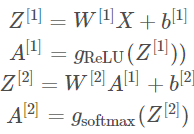

Backward propagation:

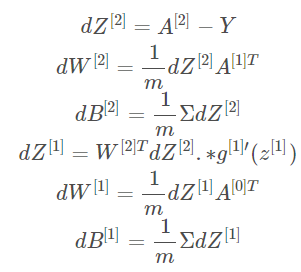